In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#*Import Modules*#

In [1]:
import os
import glob
import nltk
import string
import missingno
import unicodedata
import re
import pandas as pd
import numpy as np
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
color = sns.color_palette()
import matplotlib.pyplot as plt

nltk.download('stopwords')
from nltk.corpus import stopwords
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly as py
import folium
%matplotlib inline

import math

import random
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')

#color pallette
cnf = '#393e46'
dth = '#ff2e63'
rec = '#21bf73'
act = '#fe9801'
eng_stopwords = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#Exploratory Data Analysis#

Exploratory Data Analysis (EDA) refers to the critical process of performing initial investigations on data so as to discover patterns, to spot anomalies, to test hypotheses and to check assumptions with the help of summary statistics and graphical representations.
                

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (0,4,5,10,11,12,13,16,17,23,24,25,26,27,29,36,38,39) have mixed types.Specify dtype option on import or set low_memory=False.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (17,39) have mixed types.Specify dtype option on import or set low_memory=False.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an erro

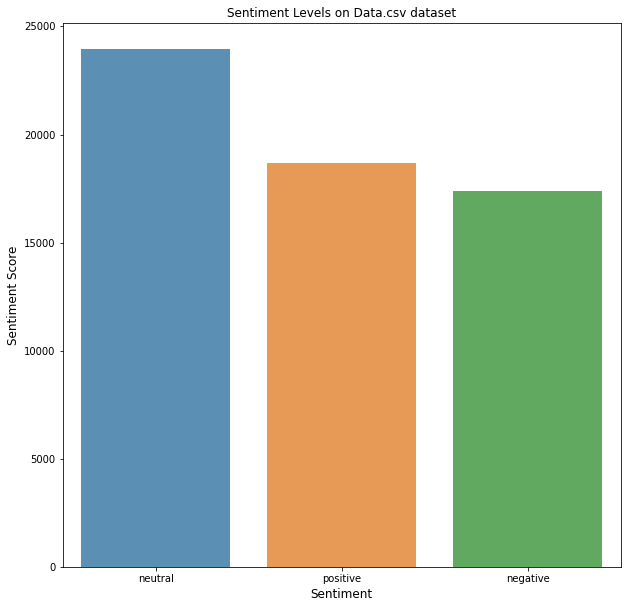

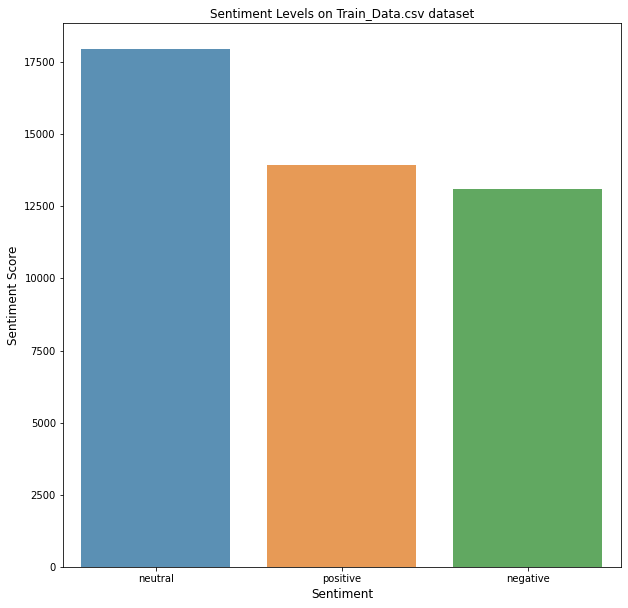

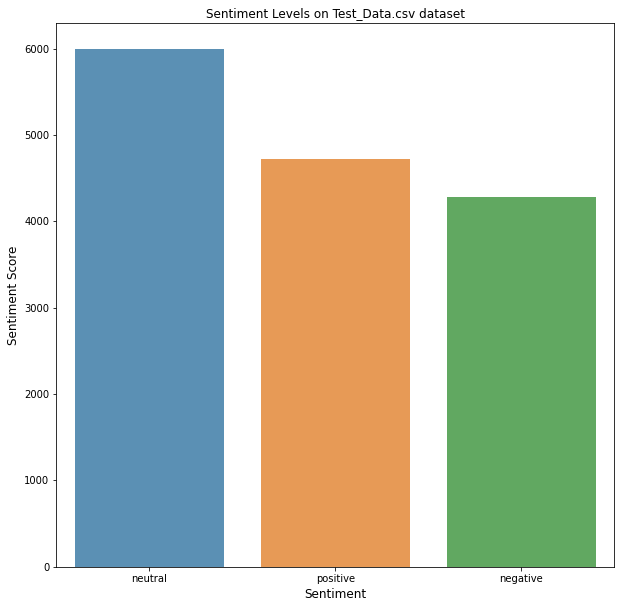

In [ ]:
# Plotting Bar diagram indicating Sentiment with Sentiment Score
Path = "/content/drive/My Drive/Final_Datasets/*.csv"
csv_list = glob.glob(Path)# collecting all files having same path 
mylist=csv_list[1:4]
for f in mylist:
  df=pd.read_csv(f)#reading the csv file
  data=df.Sentiment.value_counts()#Creating the dataframe of Sentiment values and its count
  base = os.path.basename(f)#name of the file in the path
  plt.figure(figsize=(10,10))
  plt.xlabel("Sentiment",fontsize=12)
  plt.ylabel("Sentiment Score",fontsize=12)
  plt.title("Sentiment Levels on "+str(base)+" dataset")
  sns.barplot(data.index,data.values,alpha=0.8)

By plotting the bar and funnel graph on the basis of sentiments and the sentiment score, it is clear that there is not much of a difference in the sentiment trend prevalant in India when compared to the rest of the world. From the tweets it can be inferred that people are mostly neutral or positive about the pandemic, with only a very few people being negative towards it.

In [ ]:
#Plotting the Funnel graph for better visualization ofSentiment levels
for f in mylist: 
  df=pd.read_csv(f)
  data=df.Sentiment.value_counts()
  base = os.path.basename(f)
  fig = go.Figure(go.Funnelarea(
      values = data.values, text = ["Neutral","Positive","Negative"],
      marker = {"colors": ["deepskyblue", "lightsalmon", "tan"],
      
              "line": {"color": ["wheat", "wheat", "wheat"]}},
                 title = {"position": "top center", "text": "Sentiment levels on "+str(base)+" dataset"}))
  fig.show()   

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (0,4,5,10,11,12,13,16,17,23,24,25,26,27,29,36,38,39) have mixed types.Specify dtype option on import or set low_memory=False.



/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (17,39) have mixed types.Specify dtype option on import or set low_memory=False.



The next step is to perform analysis on the data to get insights regarding the text data. The exploratory data analysis also helps in predicting the strengths and weakness of model because through observation of trends in the data it can be seen that which factors influence the model's generalization capability. The initial approach is to study the frequency of words appearing in the different dataset used. When implemented it was evident, as expected, that english stopwords and punctuations had a high frequency in the data. So, the approach was to clean the data for Analysis by removing the stopwords in nltk module and also punctuation marks. The following code block is used for refining data for analysis.



/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (0,4,5,10,11,12,13,16,17,23,24,25,26,27,29,36,38,39) have mixed types.Specify dtype option on import or set low_memory=False.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



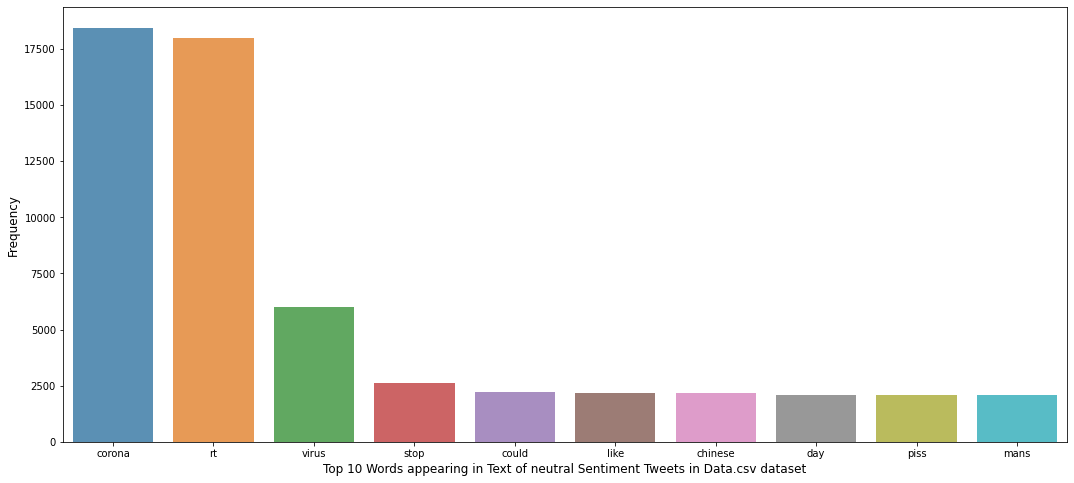

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



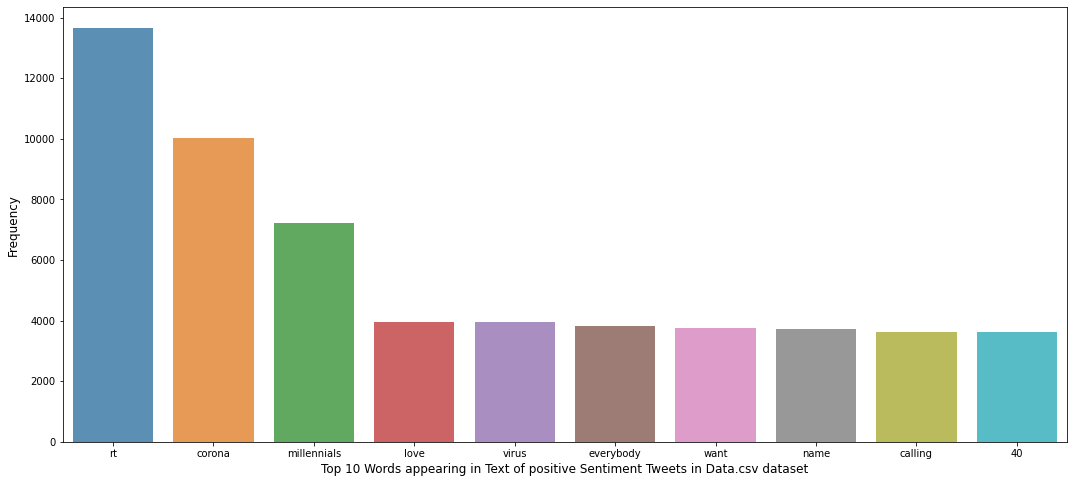

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



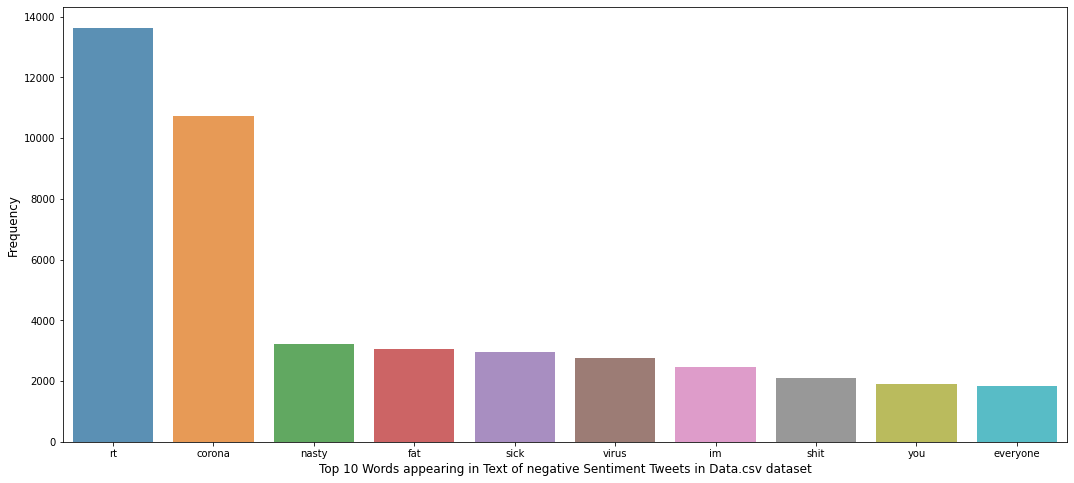

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (17,39) have mixed types.Specify dtype option on import or set low_memory=False.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



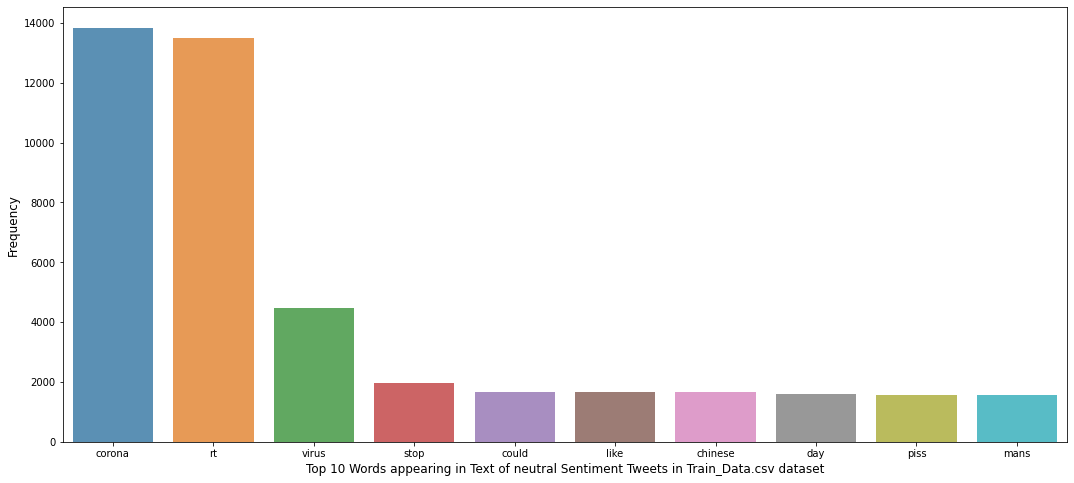

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



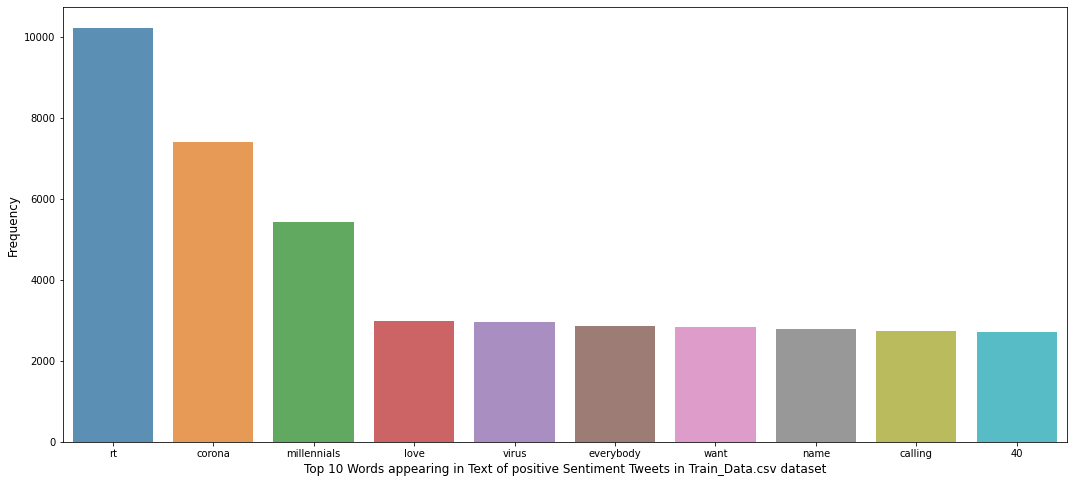

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



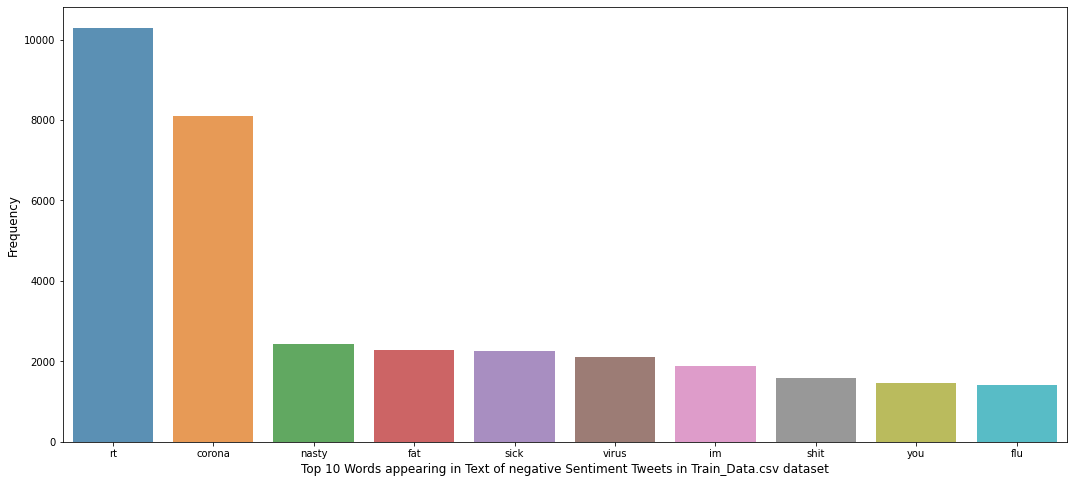

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



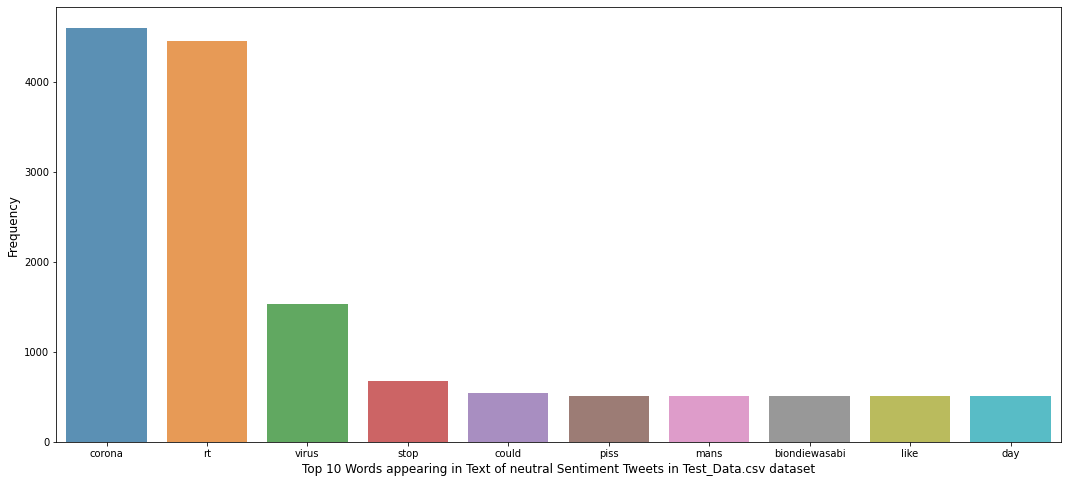

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



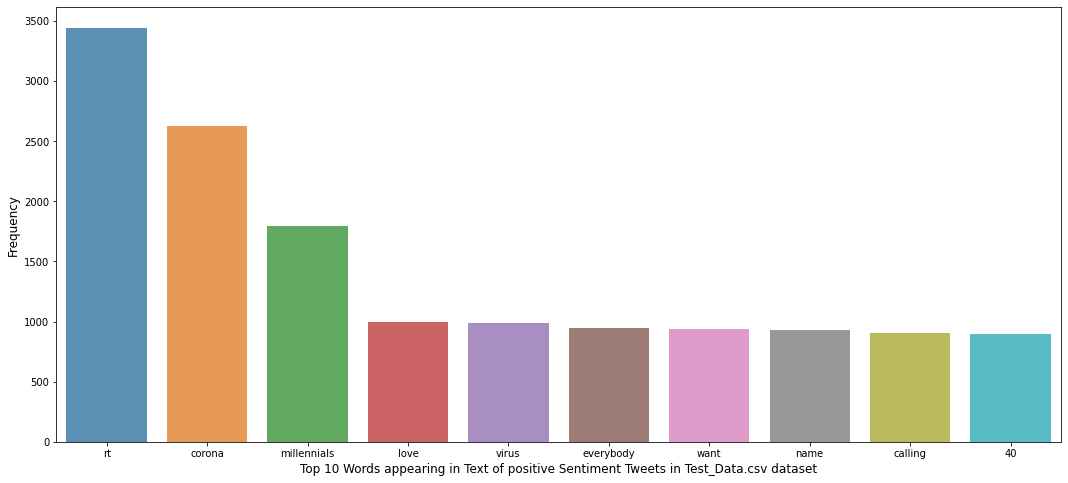

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



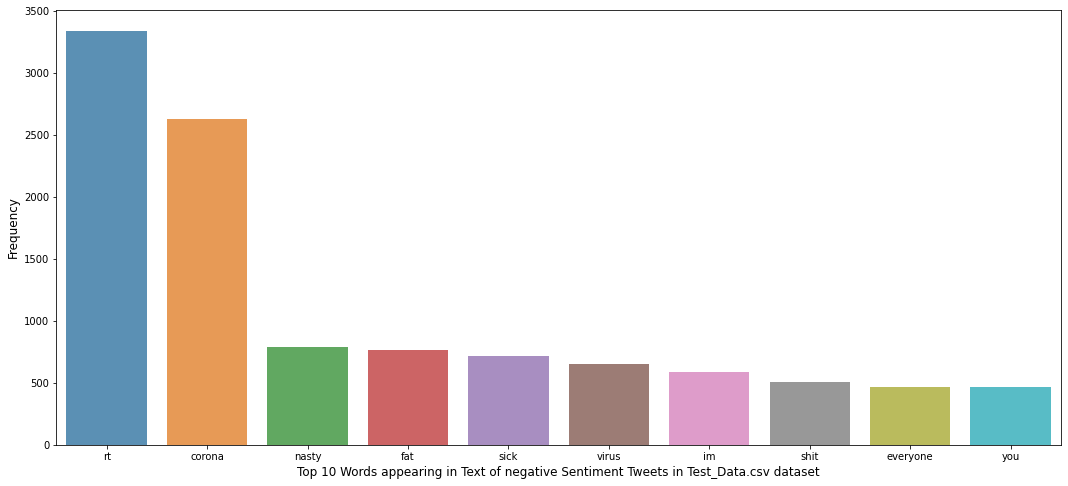

In [ ]:
#Plotting the bar graph of top frequently 10 occuring words for each Sentiment in each datset
for f in mylist: 
  df=pd.read_csv(f)
  base = os.path.basename(f)
  data=df.Sentiment.value_counts()
  Analysis_Data = df
  Analysis_Data["full_text"]= Analysis_Data["full_text"].str.lower()#converting the text into lowercase
  Analysis_Data['full_text'] = Analysis_Data['full_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (eng_stopwords)]))#removing the english stopwords
  Analysis_Data['full_text'] = Analysis_Data['full_text'].str.replace('[^\w\s]','')#removing the emojis
  for i in range(0,3):
    Sentiment = Analysis_Data[Analysis_Data['Sentiment'] == data.index[i]]#Creating the dataframe of having same sentiment
    Word_frequency = pd.Series(' '.join(Sentiment.full_text).split()).value_counts()[:10]#Calculating the words frequency
    plt.figure(figsize=(18,8))
    sns.barplot(Word_frequency.index, Word_frequency.values, alpha=0.8)
    plt.ylabel('Frequency', fontsize=12)
    plt.xlabel('Top 10 Words appearing in Text of '+str(data.index[i])+' Sentiment Tweets in '+str(base)+' dataset', fontsize=12)
    plt.show()

From the above frequency graphs and trends it is clearly evident that the most frequently used terms by twitterati in India and the rest of the world are "Corona" and "COVID-19" when compared to the other words. "rt", the most frequntly used term in the world dataset, means "retweet". The high usage of the word in this pandemic could be attributed to the fact that people showed great enthusiasm in retweeting the tweets related coronavirus, so it can be understood that the model should not generalize and classify tweets based on the presence of word "Corona", "COVID-19" and "rt". The trends from the graphs plotted above further strengthen our belief that the Indian dataset is similar to the world dataset in terms of sentiments expressed. Words like "fat" and "sick" have frequent occurrences in tweets, showing that people started paying attention to their health more than they previously did. "Love" was the most frequently used positive term and "nasty" was the most used negative term.

Finally, the frequency distribution plotted above gives us a good perspective of the dataset and also gives us an insight into predicting the model's generalization capability.

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (0,4,5,10,11,12,13,16,17,23,24,25,26,27,29,36,38,39) have mixed types.Specify dtype option on import or set low_memory=False.



On Data.csv Dataset


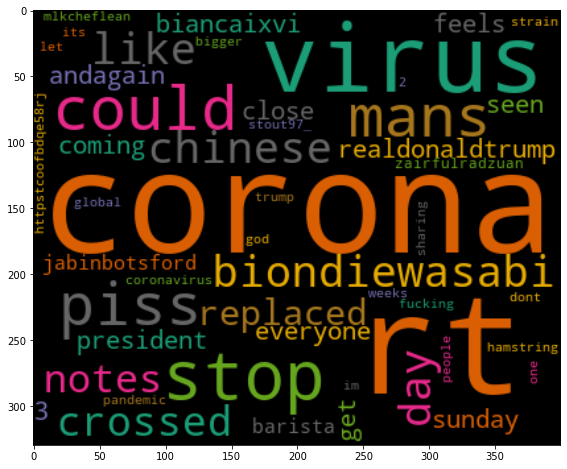

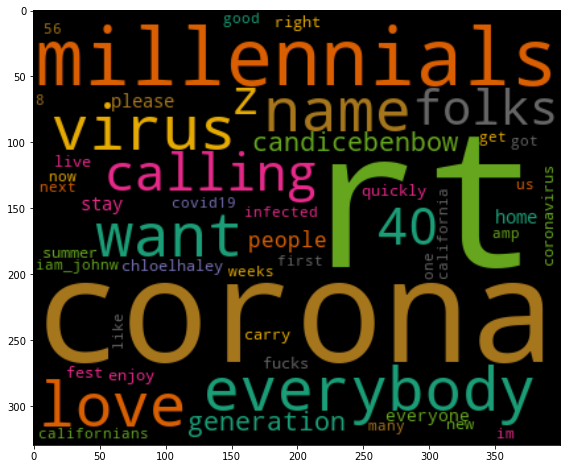

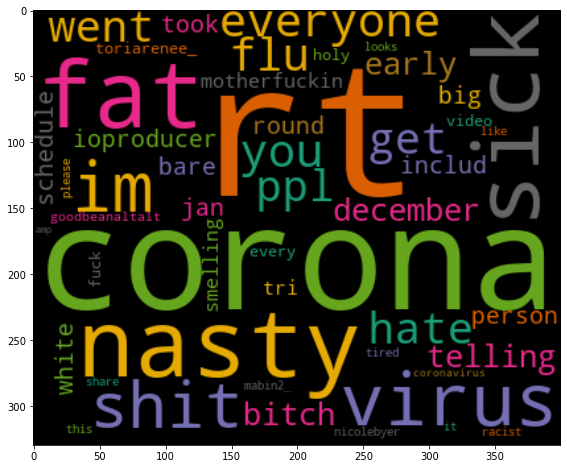

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (17,39) have mixed types.Specify dtype option on import or set low_memory=False.



On Train_Data.csv Dataset


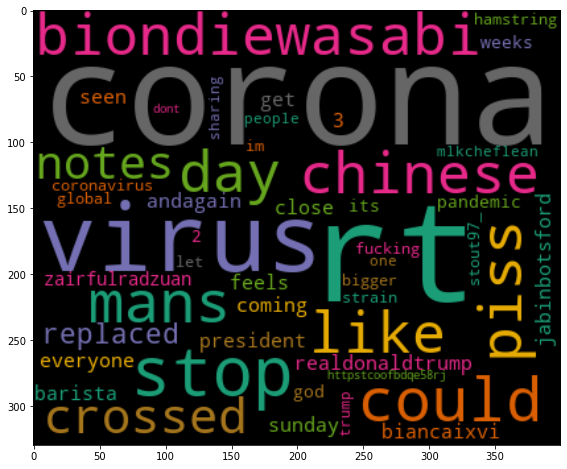

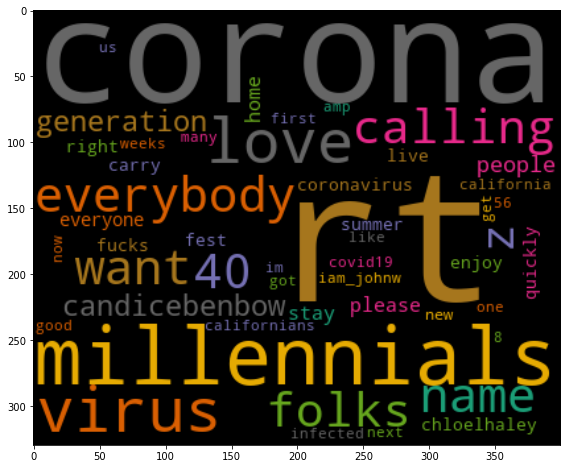

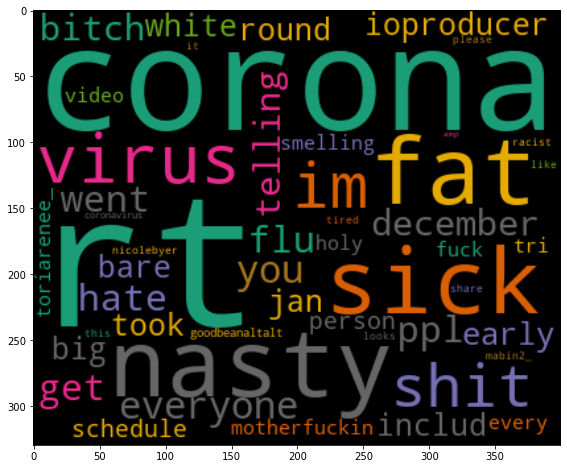

On Test_Data.csv Dataset


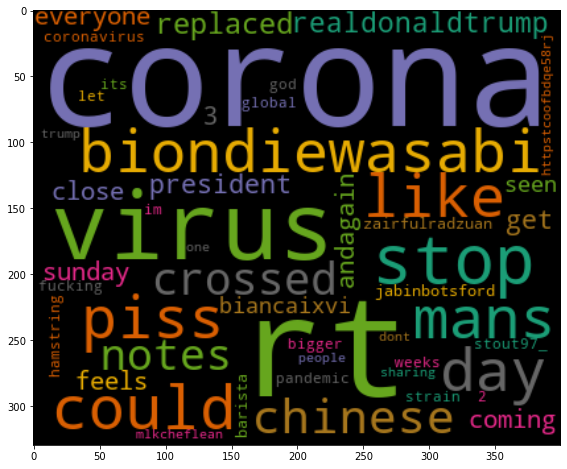

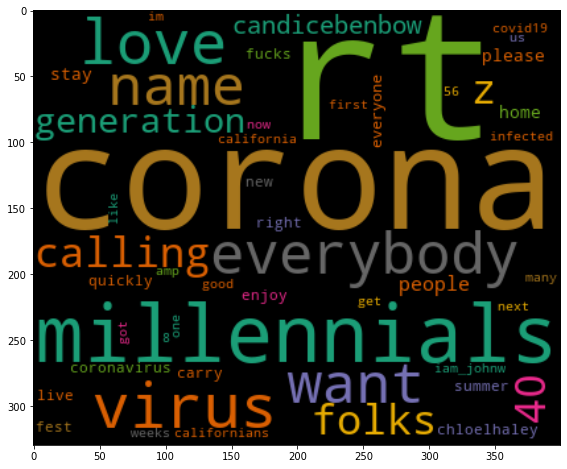

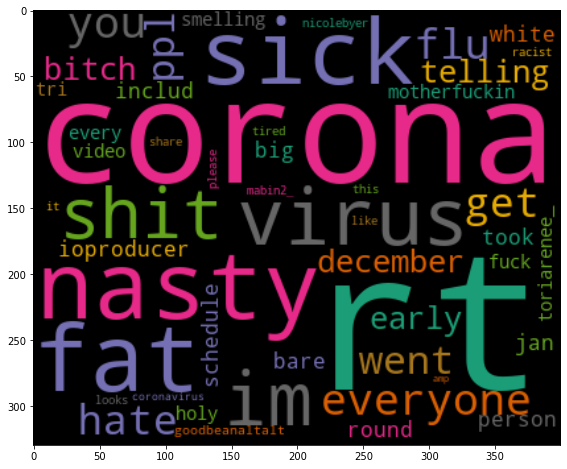

In [ ]:
#looking at the common words present in the tweets for each Sentiment
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.show()
# Plotting word cloud for each Sentiment in each data Sentiment
for f in mylist: 
  df=pd.read_csv(f)
  data=df.Sentiment.value_counts()
  base = os.path.basename(f)
  print("On "+str(base)+" Dataset")
  for i in range(3):
    Sentiment = Analysis_Data[Analysis_Data['Sentiment'] == data.index[i]]
    Word_frequency = pd.Series(' '.join(Sentiment.full_text).split()).value_counts()[:50] 
    generate_wordcloud(Word_frequency.sort_values(ascending=False),data.index[i])

#Statistical Analysis#


In this approach, the data will not be pre-processed to remove stopwords and punctuations as they usually tend to contribute to the performance of deep learning models. The following code is used to normalize the data through soft pre-processing.

In [ ]:
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
    )
def normalizeString(s):
    if not isinstance(s, float):
      s = unicodeToAscii(s.lower().strip())
      s = re.sub(r"([.!?])", r" \1", s)
      s = re.sub(r"[^a-zA-Z.!?]+", r" ", s)
    return s


The following code is used to obtain the following metafeatures: 'Num_words', 'Num_unique_words', 'Num_chars', 'Num_stopwords', 'Num_punctuations', 'Num_words_upper', 'Mean_word_len'.

In [ ]:
Analysis_Data = pd.read_csv("/content/drive/My Drive/Final_Datasets/Data.csv")
Analysis_Data['full_text'] = Analysis_Data["full_text"].apply(lambda x: normalizeString(x)) #Normalising the string
Analysis_Data["num_words"] = Analysis_Data['full_text'].apply(lambda x: len(str(x).split()))#calculating the number of words in each tweet
Analysis_Data["num_unique_words"] = Analysis_Data['full_text'].apply(lambda x: len(set(str(x).split())))#Calculating the number of words
Analysis_Data["num_chars"] = Analysis_Data['full_text'].apply(lambda x: len(str(x)))#Calculating the number of characters
Analysis_Data["num_stopwords"] = Analysis_Data['full_text'].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))#Calculating the number of stop words
Analysis_Data["num_punctuations"] = Analysis_Data['full_text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )
Analysis_Data["num_words_upper"] = Analysis_Data['full_text'].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
Analysis_Data["mean_word_len"] = Analysis_Data['full_text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))   

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (0,4,5,10,11,12,13,16,17,23,24,25,26,27,29,36,38,39) have mixed types.Specify dtype option on import or set low_memory=False.



Next, pandas DataFrame function describe( ) is used to obtain a statistical inference of the various metafeatures.

In [ ]:
Analysis_Data.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,quoted_status_id,quoted_status_id_str,retweeted_status,quote_count,reply_count,retweet_count,favorite_count,filter_level,matching_rules,current_user_retweet,scopes,withheld_copyright,withheld_in_countries,withheld_scope,contributors,num_words,num_unique_words,num_chars,num_stopwords,num_punctuations,num_words_upper,mean_word_len
count,5.999900e+04,1.055000e+03,1.000000e+00,1.000000e+00,4.000000e+01,4.000000e+01,7.000000e+00,7.000000e+00,0.0,0.0,0.0,59999.000000,1055.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.0,59999.000000
mean,1.241197e+18,1.263899e+18,1.262276e+18,1.262276e+18,7.779688e+17,7.779688e+17,1.266887e+18,1.266887e+18,NaN,NaN,NaN,21725.070868,0.781043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.392673,18.597843,109.174820,7.420790,1.382056,0.0,4.450781
std,3.119222e+15,5.352974e+15,NaN,NaN,5.390027e+17,5.390027e+17,4.494721e+15,4.494721e+15,NaN,NaN,NaN,33556.650648,4.105398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.505898,7.847042,50.203183,4.840434,1.706248,0.0,0.752830
min,1.240728e+18,1.254996e+18,1.262276e+18,1.262276e+18,1.590214e+07,1.590214e+07,1.259685e+18,1.259685e+18,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,10.000000,0.000000,0.000000,0.0,1.538462
25%,1.240755e+18,1.259402e+18,1.262276e+18,1.262276e+18,2.255771e+09,2.255771e+09,1.264795e+18,1.264795e+18,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.000000,13.000000,68.000000,3.000000,0.000000,0.0,3.937500
50%,1.240793e+18,1.263397e+18,1.262276e+18,1.262276e+18,1.104830e+18,1.104830e+18,1.267274e+18,1.267274e+18,NaN,NaN,NaN,1098.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.000000,20.000000,121.000000,7.000000,1.000000,0.0,4.434783
75%,1.240827e+18,1.268573e+18,1.262276e+18,1.262276e+18,1.223005e+18,1.223005e+18,1.269642e+18,1.269642e+18,NaN,NaN,NaN,35426.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.000000,23.000000,136.000000,10.000000,2.000000,0.0,4.913043
max,1.273467e+18,1.273467e+18,1.262276e+18,1.262276e+18,1.264744e+18,1.264744e+18,1.272375e+18,1.272375e+18,NaN,NaN,NaN,234463.000000,83.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113.000000,102.000000,840.000000,40.000000,42.000000,0.0,15.555556


In the above table we can observe the various statistical elements such as mean, standard deviation, different percentiles for the different meta features. The above table helps us gauge various aspects of the data and also is a potential indicator of model performance. As known, a deep learning model performance is based on the data used to train it, so here the mean number of words can give us a general idea of model performance on various sequence lengths.

In [ ]:
# Load Dataset
data = pd.read_csv("/content/drive/MyDrive/covid19_tweets.csv")
unprocessed_data = data
data = data.dropna()

In [ ]:
# Statistics about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45892 entries, 2 to 82709
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         45892 non-null  object
 1   user_location     45892 non-null  object
 2   user_description  45892 non-null  object
 3   user_created      45892 non-null  object
 4   user_followers    45892 non-null  int64 
 5   user_friends      45892 non-null  int64 
 6   user_favourites   45892 non-null  int64 
 7   user_verified     45892 non-null  bool  
 8   date              45892 non-null  object
 9   text              45892 non-null  object
 10  hashtags          45892 non-null  object
 11  source            45892 non-null  object
 12  is_retweet        45892 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 4.3+ MB


In [ ]:
# Plot for Percentage of data from different locations
def data_source(feature, title, df, size):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()

In [ ]:
# Plot unique value across different colums
def unique_values(data_frame):
    unique_dataframe = pd.DataFrame()
    unique_dataframe['Features'] = data_frame.columns
    uniques = []
    for col in data_frame.columns:
        u = data_frame[col].nunique()
        uniques.append(u)
    unique_dataframe['Uniques'] = uniques
    return unique_dataframe

In [ ]:
# Plot Wordcloud for Top-50 words
stopwords = set(STOPWORDS)
def display_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=1.3)

    plt.imshow(wordcloud)
    plt.show()

In [ ]:
# Plot Frequency of User Names, Tweet Sources...
def plot_frequency_charts(df, feature, title):
    freq_df = pd.DataFrame()
    freq_df[feature] = df[feature]
    
    f, ax = plt.subplots(1,1, figsize=(16,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 

    plt.title('Frequency of {} tweeting about Corona'.format(feature))
    plt.ylabel('Frequency', fontsize=12)
    plt.xlabel(title, fontsize=12)
    plt.xticks(rotation=90)
    plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



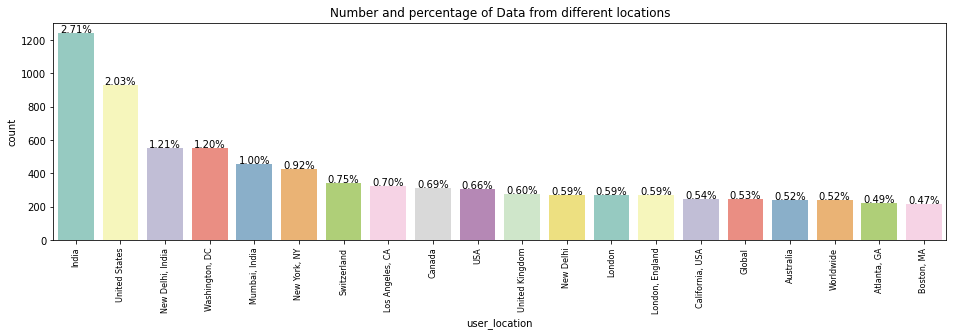

In [ ]:
# Percentage of data from different locations
data_source("user_location", "Data from different locations", data, 4)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



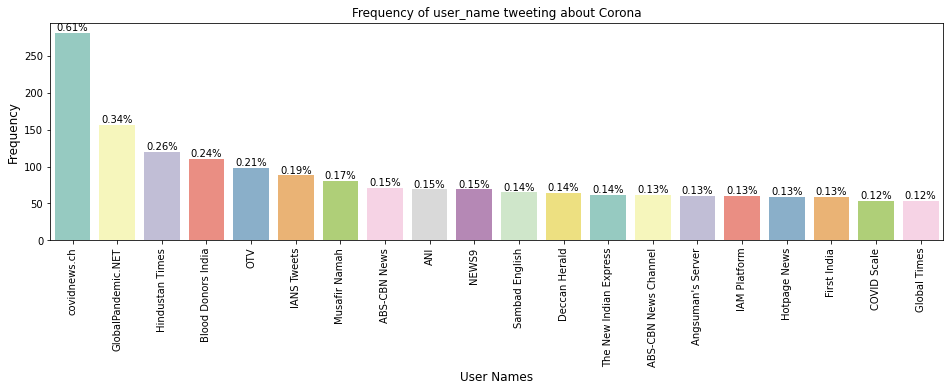

In [ ]:
# Top 20 users based on frequency of tweets
plot_frequency_charts(data, 'user_name', 'User Names')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



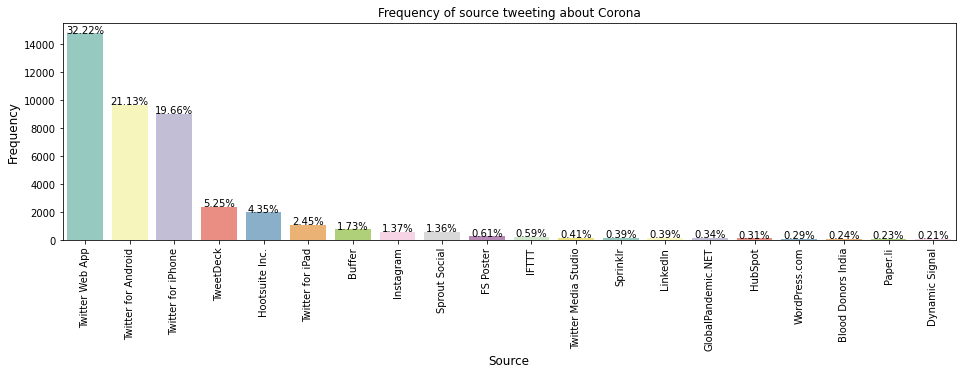

In [ ]:
# Top 20 tweet sources based on frequency of tweets
plot_frequency_charts(data, 'source','Source')

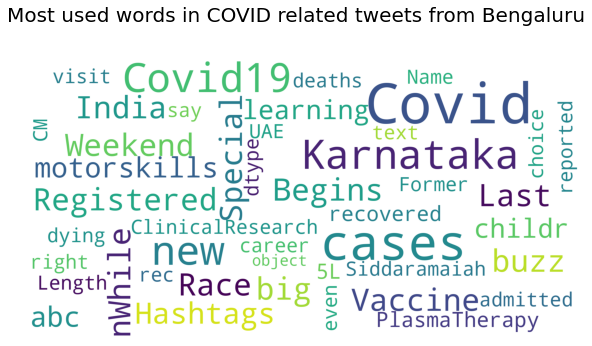

In [ ]:
# WordCloud for top-50 words in tweets from Bangalore
bang_df1 = data.loc[data.user_location == "Bengaluru"]
bang_df2 = data.loc[data.user_location == "Bangalore"]
dfs = [bang_df2, bang_df1]
bang_df = pd.concat(dfs, axis=0, join='inner', ignore_index=False, keys=None,
                    levels=None, names=None, verify_integrity=False, copy=True)
display_wordcloud(bang_df['text'], title = 'Most used words in COVID related tweets from Bengaluru')

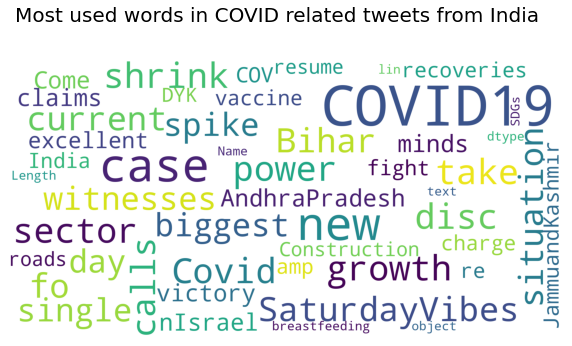

In [ ]:
# WordCloud for top-50 words in tweets from India
india_df1 = data.loc[data.user_location=="India"]
india_df2 = data.loc[data.user_location=="New Delhi, India"]
india_df3 = data.loc[data.user_location=="Mumbai, India"]
india_df4 = data.loc[data.user_location=="New Delhi"]
dfs1 = [india_df1, india_df2, india_df3, india_df4]
india_df = pd.concat(dfs1, axis=0, join='inner', ignore_index=False, keys=None,
                    levels=None, names=None, verify_integrity=False, copy=True)
display_wordcloud(india_df['text'], title = 'Most used words in COVID related tweets from India')

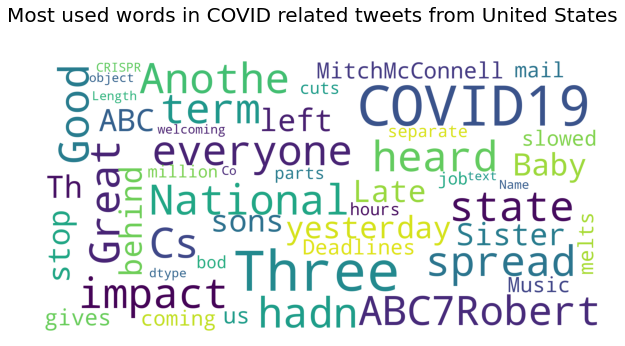

In [ ]:
# WordCloud for top-50 words in tweets from United States of America
usa_df1 = data.loc[data.user_location=="United States"]
usa_df2 = data.loc[data.user_location=="Washington, DC"]
usa_df3 = data.loc[data.user_location=="New York, NY"]
usa_df4 = data.loc[data.user_location=="Los Angeles, CA"]
usa_df5 = data.loc[data.user_location=="USA"]
usa_df6 = data.loc[data.user_location=="California, USA"]
dfs2 = [usa_df1, usa_df2, usa_df3, usa_df4, usa_df5, usa_df6]
usa_df = pd.concat(dfs2, axis=0, join='inner', ignore_index=False, keys=None,
                    levels=None, names=None, verify_integrity=False, copy=True)
display_wordcloud(usa_df['text'], title = 'Most used words in COVID related tweets from United States')

In [3]:
# load the dataset
df = pd.read_csv('/content/drive/MyDrive/covid_data/covid_19_data_cleaned.csv', parse_dates=['Date'])

country_daywise = pd.read_csv('/content/drive/MyDrive/covid_data/country_daywise.csv', parse_dates=['Date'])
countywise = pd.read_csv('/content/drive/MyDrive/covid_data/countrywise.csv')
daywise = pd.read_csv('/content/drive/MyDrive/covid_data/daywise.csv', parse_dates=['Date'])

In [4]:
# fill NA
df['Province/State'] = df['Province/State'].fillna("")
# grouping by date
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()

In [5]:
# See your first plot
fig = go.Figure()
fig.add_trace(go.Scatter(x = confirmed['Date'], y = confirmed['Confirmed'], mode = 'lines', name = 'Confirmed', line = dict(color = "Orange", width = 2)))
fig.add_trace(go.Scatter(x = recovered['Date'], y = recovered['Recovered'], mode = 'lines', name = 'Recovered', line = dict(color = "Green", width = 2)))
fig.add_trace(go.Scatter(x = deaths['Date'], y = deaths['Deaths'], mode = 'lines', name = 'Deaths', line = dict(color = "Red", width = 2)))
fig.update_layout(title = 'Worldwide Covid-19 Cases', xaxis_tickfont_size = 14, yaxis = dict(title = 'Number of Cases'))

fig.show()

# CASES DENSITY ANIMATION ON WORLD MAP

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129260 entries, 0 to 129259
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Date            129260 non-null  datetime64[ns]
 1   Province/State  129260 non-null  object        
 2   Country         129260 non-null  object        
 3   Lat             129260 non-null  float64       
 4   Long            129260 non-null  float64       
 5   Confirmed       129260 non-null  int64         
 6   Recovered       129260 non-null  int64         
 7   Deaths          129260 non-null  int64         
 8   Active          129260 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 8.9+ MB


In [7]:
df['Date'] = df['Date'].astype(str)

In [8]:
fig = px.density_mapbox(df, lat = 'Lat', lon = 'Long', hover_name = 'Country', hover_data = ['Confirmed','Recovered','Deaths'], animation_frame="Date", color_continuous_scale="Portland", radius=7,zoom=0,height= 700)
fig.update_layout(title = 'Worldwide covid19 cases with Time laps')
fig.update_layout(mapbox_style = 'open-street-map', mapbox_center_lon = 0)

fig.show()

Output hidden; open in https://colab.research.google.com to view.

# Cases Over the time with Area plot

In [9]:
temp = df.groupby('Date')['Confirmed','Deaths','Recovered','Active'].sum().reset_index()
temp = temp[temp['Date']==max(temp['Date'])].reset_index(drop=True)
tm = temp.melt(id_vars= 'Date' , value_vars = ['Active','Deaths','Recovered'])
fig = px.treemap(tm, values = 'value', height = 250, width = 800, color_discrete_sequence=[act,rec,dth])

fig.data[0].textinfo = 'label+text+value'

In [10]:
temp = df.groupby('Date')['Recovered', 'Deaths', 'Active'].sum().reset_index()
temp = temp.melt(id_vars= 'Date', value_vars = ['Recovered', 'Deaths', 'Active'], var_name='Case', value_name='Count')

fig = px.area(temp, x ='Date', y = 'Count', color = 'Case', height = 600, title='Cases over time', color_discrete_sequence=[rec, dth, act])
fig.update_layout(xaxis_rangeslider_visible = True)
fig.show()

# Folium maps

In [11]:
temp = df[df['Date']==max(df['Date'])]
m = folium.Map(location = [0,0], tiles='cartodbpositron', min_zoom = 1, max_zoom= 4, zoom_start=1)

for i in range(0, len(temp)):
    folium.Circle(location=[temp.iloc[i]['Lat'], temp.iloc[i]['Long']], color = 'crimson', fill = 'crimson',tooltip='<li><bold> Country: ' + str(temp.iloc[i]['Country'])+
                '<li><bold> Province: ' + str(temp.iloc[i]['Province/State']) + '<li><bold> Confirmed: ' + str(temp.iloc[i]['Confirmed']) + 
                '<li><bold> Deaths: ' + str(temp.iloc[i]['Deaths']), radius = int(temp.iloc[i]['Confirmed'])**0.5).add_to(m)
m

# Confirmed Cases with Choropleth Map

In [12]:
fig = px.choropleth(country_daywise, locations= 'Country', locationmode='country names',color = country_daywise['Confirmed'],
                    hover_name = 'Country', animation_frame=country_daywise['Date'].dt.strftime('%Y-%m-%d'),
                    title="Cases over time", color_continuous_scale=px.colors.sequential.Inferno)
fig.update(layout_coloraxis_showscale=True)

Output hidden; open in https://colab.research.google.com to view.

# Deaths & Recoveries per 100 Cases

In [13]:
fig_c = px.bar(daywise, x = 'Date', y = "Confirmed", color_discrete_sequence=[act])
fig_d = px.bar(daywise, x = 'Date', y = "Deaths", color_discrete_sequence=[dth])

fig = make_subplots(rows = 1, cols = 2, shared_xaxes = False, horizontal_spacing=0.1,subplot_titles=('Confirmed Cases','Deaths Cases'))

fig.add_trace(fig_c['data'][0], row = 1, col = 1)
fig.add_trace(fig_d['data'][0], row = 1, col = 2)

fig.update_layout(height = 480)
fig.show()

# Confirmed & Death cases with static Colormap

In [14]:
fig_c = px.choropleth(countywise, locations = 'Country', locationmode='country names',color= countywise['Confirmed'], hover_name= 'Country', hover_data= ['Confirmed'])
temp = countywise[countywise['Deaths']>0]
fig_d = px.choropleth(temp, locations = 'Country', locationmode='country names',color= temp['Deaths'], hover_name= 'Country', hover_data=['Deaths'])

fig = make_subplots(rows = 1, cols = 2, subplot_titles=['Confirmed','Deaths'], specs = [[{'type':'choropleth'},{'type':'choropleth'}]])

fig.add_trace(fig_c['data'][0], row = 1, col = 1)
fig.add_trace(fig_d['data'][0], row = 1, col = 2)
fig.show()

# New Cases & no. of countries

In [15]:
fig_c = px.bar(daywise, x ='Date', y='Confirmed', color_discrete_sequence=[act])
fig_d = px.bar(daywise, x ='Date', y='No. of Countries', color_discrete_sequence=[dth])

fig = make_subplots(rows = 1, cols = 2, shared_xaxes = False, horizontal_spacing=0.1,subplot_titles=('No. of new cases per day','No. of countries'))

fig.add_trace(fig_c['data'][0], row = 1, col = 1)
fig.add_trace(fig_d['data'][0], row = 1, col = 2)

#fig.update_layout(height = 480)
fig.show()

# Top 15 Countries Case analysis

In [16]:
top =15

fig_c = px.bar(countywise.sort_values('Confirmed').tail(top), x ='Confirmed',y = 'Country',
               text = 'Confirmed', orientation='h', color_discrete_sequence=[cnf])

fig_d = px.bar(countywise.sort_values('Deaths').tail(top), x ='Deaths',y = 'Country',
               text = 'Deaths', orientation='h', color_discrete_sequence=[dth])

fig_a = px.bar(countywise.sort_values('Active').tail(top), x ='Active',y = 'Country',
               text = 'Active', orientation='h', color_discrete_sequence=[act])

fig_r = px.bar(countywise.sort_values('Recovered').tail(top), x ='Recovered',y = 'Country',
               text = 'Recovered', orientation='h', color_discrete_sequence=[rec])

fig_dc = px.bar(countywise.sort_values('Deaths / 100 Cases').tail(top), x ='Deaths / 100 Cases',y = 'Country',
               text = 'Deaths / 100 Cases', orientation='h', color_discrete_sequence=['#f84351'])

fig_rc = px.bar(countywise.sort_values('Recovered / 100 Cases').tail(top), x ='Recovered / 100 Cases',y = 'Country',
               text = 'Recovered / 100 Cases', orientation='h', color_discrete_sequence=['#a45398'])

fig_nc = px.bar(countywise.sort_values('New Cases').tail(top), x ='New Cases',y = 'Country',
               text = 'New Cases', orientation='h', color_discrete_sequence=['#f04341'])

temp = countywise[countywise['Population']>1000000]
fig_p = px.bar(temp.sort_values('Cases / Million People').tail(top), x ='Cases / Million People',y = 'Country',
               text = 'Cases / Million People', orientation='h', color_discrete_sequence=['#b40398'])

fig_wc = px.bar(countywise.sort_values('1 week change').tail(top), x ='1 week change',y = 'Country',
               text = '1 week change', orientation='h', color_discrete_sequence=['#b00398'])

temp = countywise[countywise['Confirmed']>10000]
fig_wi = px.bar(temp.sort_values('1 week % increase').tail(top), x ='1 week % increase',y = 'Country',
               text = '1 week % increase', orientation='h', color_discrete_sequence=['#c04041'])


fig = make_subplots(rows = 5, cols = 2, shared_xaxes = False, horizontal_spacing=0.14,subplot_titles=('Confirmed Cases','Deaths reported','Active Cases','Recovered cases','Deaths / 100 Cases','Recovered / 100 Cases','New Cases', 'Cases / million people','1 week change','1 week % increase'))

fig.add_trace(fig_c['data'][0], row = 1, col = 1)
fig.add_trace(fig_d['data'][0], row = 1, col = 2)
fig.add_trace(fig_a['data'][0], row = 2, col = 1)
fig.add_trace(fig_r['data'][0], row = 2, col = 2)
fig.add_trace(fig_dc['data'][0], row = 3, col = 1)
fig.add_trace(fig_rc['data'][0], row = 3, col = 2)
fig.add_trace(fig_nc['data'][0], row = 4, col = 1)
fig.add_trace(fig_p['data'][0], row = 4, col = 2)
fig.add_trace(fig_wc['data'][0], row = 5, col = 1)
fig.add_trace(fig_wi['data'][0], row = 5, col = 2)
fig.update_layout(height= 4000)
fig.show()

In [17]:
countywise.columns

Index(['Country', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New Cases',
       'Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Population', 'Cases / Million People', 'Confirmed last week',
       '1 week change', '1 week % increase'],
      dtype='object')

# Scatter plot for Deaths vs Confirmed cases

In [18]:
fig = px.scatter(countywise.sort_values('Deaths',ascending =False).head(top),x = 'Confirmed', y = 'Deaths',color = 'Country', size = 'Confirmed',height=700,text= 'Country', log_x=True, log_y=True,
                 title='Deaths vs Confirmed Cases(On log scale)')

fig.update_traces(textposition = 'top center')
fig.update_layout(showlegend=True)
fig.update_layout(xaxis_rangeslider_visible = True)
fig.show()

In [19]:
fig = px.line(country_daywise, x='Date', y = 'Confirmed', color='Country', height = 600,
             title='Confirmed', color_discrete_sequence=px.colors.cyclical.mygbm)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [20]:
fig = px.line(country_daywise, x='Date', y = 'Deaths', color='Country', height = 600,
             title='Deaths', color_discrete_sequence=px.colors.cyclical.mygbm)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [21]:
fig = px.line(country_daywise, x='Date', y = 'Recovered', color='Country', height = 600,
             title='Recovered', color_discrete_sequence=px.colors.cyclical.mygbm)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

# Growth Rate after 10000 cases

In [10]:
gt_10000 = country_daywise[country_daywise['Confirmed']>10000]['Country'].unique()
temp = df[df['Country'].isin(gt_10000)]

temp = temp.groupby(['Country','Date'])['Confirmed'].sum().reset_index()
temp = temp[temp['Confirmed']>10000]

min_date = temp.groupby('Country')['Date'].min().reset_index()
min_date.columns = ['Country','Min Date']

from_10000th_case = pd.merge(temp, min_date, on = 'Country')
from_10000th_case['N days'] = (from_10000th_case['Date'] - from_10000th_case['Min Date']).dt.days

fig = px.line(from_10000th_case, x = 'N days', y = 'Confirmed', color = 'Country', title = 'N days from 10000 case', height = 600)
fig.show()

In [11]:
gt_1000000 = country_daywise[country_daywise['Confirmed']>1000000]['Country'].unique()
temp = df[df['Country'].isin(gt_1000000)]

temp = temp.groupby(['Country','Date'])['Confirmed'].sum().reset_index()
temp = temp[temp['Confirmed']>1000000]

min_date = temp.groupby('Country')['Date'].min().reset_index()
min_date.columns = ['Country','Min Date']

from_1000000th_case = pd.merge(temp, min_date, on = 'Country')
from_1000000th_case['N days'] = (from_1000000th_case['Date'] - from_1000000th_case['Min Date']).dt.days

fig = px.line(from_1000000th_case, x = 'N days', y = 'Confirmed', color = 'Country', title = 'N days from 1000000 case', height = 600)
fig.show()

# Tree Map analysis

In [6]:
#confirmed cases
full_latest = df[df['Date'] == max(df['Date'])]

fig = px.treemap(full_latest.sort_values(by = 'Confirmed', ascending = False).reset_index(drop = True),
                 path = ['Country','Province/State'], values = 'Confirmed', height = 700,
                 title = 'Number of confirmed cases',color_discrete_sequence = px.colors.qualitative.Dark2)

fig.data[0].textinfo = 'label+text+value'
fig.show()

In [ ]:
!pip install --upgrade plotly

     |████████████████████████████████| 13.2MB 242kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


# First & last Case Report time

In [7]:
first_date = df[df['Confirmed']>0]
first_date = first_date.groupby('Country')['Date'].agg(['min']).reset_index()

last_date = df.groupby(['Country','Date'])['Confirmed','Deaths','Recovered']
last_date = last_date.sum().diff().reset_index()

mask = (last_date['Country'] != last_date['Country'].shift(1))

last_date.loc[mask, 'Confirmed'] = np.nan
last_date.loc[mask, 'Deaths'] = np.nan
last_date.loc[mask, 'Recovered'] = np.nan

last_date = last_date[last_date['Confirmed']>0]
last_date = last_date.groupby('Country')['Date'].agg(['max']).reset_index()

first_last = pd.concat([first_date, last_date['max']], axis=1)
first_last['max'] = first_last['max'] + timedelta(days=1)

first_last['Days'] = first_last['max'] - first_last['min']
first_last['Task'] = first_last['Country']

first_last.columns = ['Country', 'Start' , 'Finish', 'Days', 'Task']

first_last = first_last.sort_values('Days')
colors = ['#' + ''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(len(first_last))]
fig = ff.create_gantt(first_last, index_col = 'Country', colors = colors, show_colorbar = False,
                      bar_width=0.2, showgrid_x=True, showgrid_y=True, height = 2500)

fig.show()

## Confirmed cases country & day wise

In [12]:
temp = country_daywise.groupby(['Country','Date'])['Confirmed'].sum().reset_index()
temp = temp[temp['Country'].isin(gt_1000000)]

countries = temp['Country'].unique()

ncols = 3
nrows = math.ceil(len(countries)/ncols)

In [13]:
fig = make_subplots(rows=nrows, cols=ncols, shared_xaxes=False , subplot_titles=countries)

for ind,country in enumerate(countries):
    row = int((ind/ncols)+1)
    col = int((ind%ncols)+1)
    fig.add_trace(go.Bar(x = temp['Date'], y = temp.loc[temp['Country']==country, 'Confirmed'],name = country), row = row, col = col)

In [14]:
fig.update_layout(height=2000, title_text = 'Confirmed cases in each country')
fig.update_layout(showlegend = False)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

# Covid 19 vs Other epidemics

In [17]:
full_latest

,Date,Province/State,Country,Lat,Long,Confirmed,Recovered,Deaths,Active
459,2021-04-25,,Afghanistan,33.93911,67.709953,58843,52489,2582,3772
919,2021-04-25,,Albania,41.15330,20.168300,130537,105728,2378,22431
1379,2021-04-25,,Algeria,28.03390,1.659600,120922,84299,3207,33416
1839,2021-04-25,,Andorra,42.50630,1.521800,13060,12491,124,445
2299,2021-04-25,,Angola,-11.20270,17.873900,25609,23092,579,1938
...,...,...,...,...,...,...,...,...,...
127419,2021-04-25,Hebei,China,37.89570,114.904200,0,1310,0,-1310
127879,2021-04-25,Henan,China,33.88200,113.614000,0,1285,0,-1285
128339,2021-04-25,,Mozambique,-18.66570,35.529600,0,62501,0,-62501
128799,2021-04-25,,Syria,34.80210,38.996800,0,15913,0,-15913


In [20]:
epidemics = pd.DataFrame({'epidemic':['COVID-19','SARS','EBOLA','MERS','H1N1'],
                          'start_year':[2019,2002,2013,2012,2009],
                          'end_year':[2021,2004,2016,2020,2010],
                          'confirmed':[full_latest['Confirmed'].sum(),8422,28646,2519,6724149],
                          'Deaths':[full_latest['Deaths'].sum(),813,11323,846,19654]
                          })

epidemics['mortality'] = round((epidemics['Deaths']/epidemics['confirmed'])*100,2)
epidemics.head()

,epidemic,start_year,end_year,confirmed,Deaths,mortality
0,COVID-19,2019,2021,147189618,3109247,2.11
1,SARS,2002,2004,8422,813,9.65
2,EBOLA,2013,2016,28646,11323,39.53
3,MERS,2012,2020,2519,846,33.58
4,H1N1,2009,2010,6724149,19654,0.29


In [21]:
temp = epidemics.melt(id_vars = 'epidemic',value_vars=['confirmed','Deaths','mortality'],var_name='Case',value_name='Value')

In [22]:
fig = px.bar(temp, x = 'epidemic',y = 'Value', color = 'epidemic',text = 'Value', facet_col='Case', color_discrete_sequence=px.colors.qualitative.Bold)
fig.update_traces(textposition='outside')

fig.update_layout(uniformtext_minsize=8,uniformtext_mode = 'hide')
fig.update_yaxes(showticklabels=False)
fig.layout.yaxis2.update(matches=None)
fig.layout.yaxis3.update(matches=None)
fig.show()